In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
#3 rows deleted:
#20484	,RegEx used to extract tokens from an ASCIIMath expression"	11		1	0	0	https://i.stack.imgur.com/6VcaB.png									0	1		0	0	0	0	0	1	0	0	0	1	1	0	0	0	0	0
#71350	,Bootstrap modal wont trigger on mobile"	443	Lake Mary, FL, United States	85	165	11	https://i.stack.imgur.com/TLzJW.png?s=128&g=1									0	1		0	0	0	0	0	3	0	0	0	1	1	0	0	0	0	0
#60036	<p>from group ""Value"" i can get the value of hour and it gives output as 1	3	2	4	5	6 and so on for each generator name but since no of hour is common to all i need that i get it only once that is i should get 1	2	5	6 only once</p>							0	1		0	0	0	0	0	1	0	0	0	1	1	0	1	0	0	0

openCloseData=pd.read_csv("openCloseData9.csv")
openCloseData.head()

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)
#Actually 4 rows are removed

(159996, 47)
(159996, 46)


In [4]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [5]:
#https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
print(openCloseData.shape)
#openCloseData[openCloseData.Reputation.apply(lambda x: x.isnumeric())]
#print(openCloseData.dtypes)
#print(openCloseData.shape)

(159996, 46)


In [6]:
print(openCloseData.head())

                                             AboutMe  \
0                                                NaN   
1                                                NaN   
2  <p>Currently a software developer at HiQ Finla...   
3  <p>Love the computer science &amp; technology ...   
4                                                NaN   

                                                Body  Comment  Downvotes  \
0  <p>Please someone explain complete step by ste...      100          0   
1  <p>I've used SFST language for my project on N...      100          0   
2  <p>The following JSON is returned from SharePo...      100       2413   
3  <p>What's the benifit of allocating a chunk of...      100          3   
4  <p>I'm using an S3 bucket as the origin or a C...      100         77   

            Location    PostId  \
0                NaN  32203002   
1                NaN  31961877   
2  Helsinki, Finland  22080350   
3     中国Shanghai Shi  28019349   
4                NaN  32211159   

 

In [7]:
closeData = openCloseData[openCloseData['closed'] == 1]

In [8]:
closeData.shape

(79996, 46)

In [9]:
closeData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [10]:
X = closeData.loc[:,['Comment', 'Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'] ]
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(79996, 28)
<class 'pandas.core.frame.DataFrame'>


In [11]:
X.head()

,Comment,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,lowerUpperRatio,sentenceCount,firstLineLength,...,bodyWordCount,punctuationCount,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled,numAns,numQues
80000,102,17527,1953,2765,2005,119,4,26.153846,6,69,...,168,50,71.70,-80.10,13.96,0.0,9.83,2,583,209
80001,102,151,1425,32,16,0,5,16.448276,10,75,...,113,19,52.99,-26.31,12.32,0.0,11.98,0,0,0
80002,102,1639,900,208,75,1,3,18.916667,4,79,...,47,17,17.06,64.54,7.83,0.0,14.97,3,20,13
80003,102,2669,620,658,282,11,2,12.272727,5,210,...,94,45,26.89,32.23,9.16,0.0,17.02,4,43,70
80004,105,2669,369,658,282,11,2,32.714286,10,35,...,104,128,20.32,53.58,7.94,11.9,15.97,4,43,70


In [12]:
X['Comment']=X['Comment']-102
#print(offTopic.head())
print(X.shape)

(79996, 28)


In [13]:
X.reset_index(inplace = True)
X.drop(['index'],inplace=True,axis=1)

In [14]:
# print(X[np.isinf(X).any(axis=1)])
y = X.Comment
X.drop(['Comment'],inplace=True,axis=1)
print(y.shape)

(79996,)


In [15]:
print(X.shape)
print(X.columns)

(79996, 27)
Index(['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'],
      dtype='object')


In [23]:
print(y[0])
print(y[24000])
print(y[45000])
print(y[64000])

0
1
2
3


In [22]:
# !pip install joblib

    100% |████████████████████████████████| 286kB 92kB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'])

<class 'numpy.ndarray'>


In [25]:
#Train/Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55997, 27)
(55997,)
(23999, 27)
(23999,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


rf = RandomForestClassifier(n_estimators=50, max_depth = 20 , n_jobs = -1)
rf_model = rf.fit(X_train,y_train)

In [27]:
y_pred = rf_model.predict(X_test)

#precision,recall,fscore,support = score(y_test,y_pred,pos_label=1,average=None)
#print("Precision : {} / Recall : {} / Accuracy : {} / ".format(round(precision,3),
                                                                #round(recall,3),
                                                                #round((y_pred==y_test).sum()/len(y_pred),3)))

In [28]:
#Accuracy
np.mean(y_pred==y_test)

0.42518438268261177

In [29]:
y_train_pred = rf_model.predict(X_train)
print('Train Accuracy: ', np.mean(y_train_pred==y_train))

Train Accuracy:  0.992160294301


In [30]:
#https://scikit-learn.org/stable/modules/model_persistence.html
#EXPORTING RANDOM FOREST
from joblib import dump, load
dump(rf_model, 'randomfor_2.joblib') 

['randomfor_2.joblib']

In [31]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:20]

[(0.060106216751159576, 'Reputation'),
 (0.054742037027852145, 'lowerUpperRatio'),
 (0.054036576955065134, 'punctuationCount'),
 (0.05348286076022319, 'colemanLiauIndex'),
 (0.051718938107471753, 'Views'),
 (0.051417077295444119, 'bodyWordCount'),
 (0.049775516466894827, 'titleLengthInChars'),
 (0.049720247271468246, 'firstLineLength'),
 (0.049478031025179954, 'daleChallReadabilityScore'),
 (0.04939602009267844, 'experienceInTime'),
 (0.047890197194468159, 'fleschReadingEase'),
 (0.047721860041654136, 'codeLength'),
 (0.046660825474876877, 'gunningFog'),
 (0.04413639423600333, 'shortWordCount'),
 (0.04410723965798774, 'Upvotes'),
 (0.039855524061835165, 'numQues'),
 (0.029214237752357538, 'numAns'),
 (0.029187593437082479, 'countOfInterrogativeSent'),
 (0.028818367902911698, 'sentenceCount'),
 (0.024024990070214032, 'smogIndex')]

In [32]:
print(classification_report(y_test,y_pred) )
print("Precision: "+str(precision_score(y_test, y_pred, average='macro')) )
print("Recall: "+str(recall_score(y_test, y_pred, average='macro')) )
print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
print(precision_recall_fscore_support(y_test, y_pred, average='macro') )
# Precision, recall, fscore, support in order


             precision    recall  f1-score   support

          0       0.35      0.25      0.29      5916
          1       0.44      0.46      0.45      6116
          2       0.38      0.36      0.37      5915
          3       0.49      0.63      0.55      6052

avg / total       0.41      0.43      0.42     23999

Precision: 0.413922542106
Recall: 0.423738848195
F1 Score:0.414652771834
(0.41392254210597357, 0.42373884819488611, 0.41465277183422633, None)


In [33]:
print(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### 5 Fold Cross Validation

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)
    
val_score = cross_val_score(rf,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

[ 0.0841875   0.28089256  0.16488531  0.07231702  0.05087818]


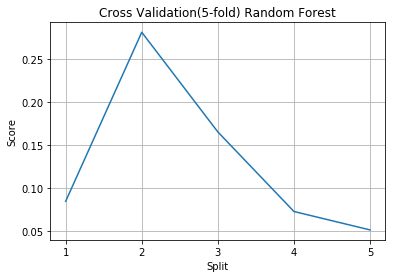

In [35]:
print(val_score)
plt.figure()
plt.plot(range(1,6), val_score)
plt.title('Cross Validation(5-fold) Random Forest')
plt.xlabel('Split')
plt.ylabel('Score')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

In [36]:
print(confusion_matrix(y_test, y_pred))

[[1479 1780 1193 1464]
 [1245 2809 1266  796]
 [ 857 1283 2127 1648]
 [ 654  557 1052 3789]]
